<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB


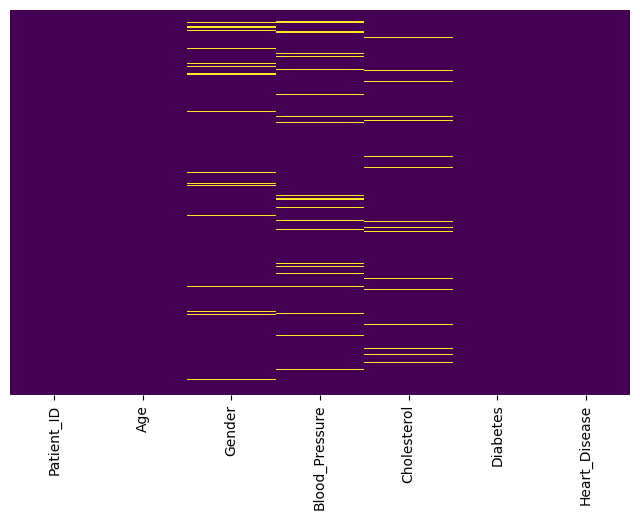

,0
Patient_ID,0.000000
Age,0.000000
Gender,4.158416
Blood_Pressure,5.940594
Cholesterol,3.960396
Diabetes,0.000000
Heart_Disease,0.000000


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Day_15_Healthcare_Data.csv"
df = pd.read_csv(file_path)

df.info()
df.head()

missing_percent = (df.isna().sum() / len(df)) * 100

plt.figure(figsize=(8, 5))
sns.heatmap(df.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()

missing_percent


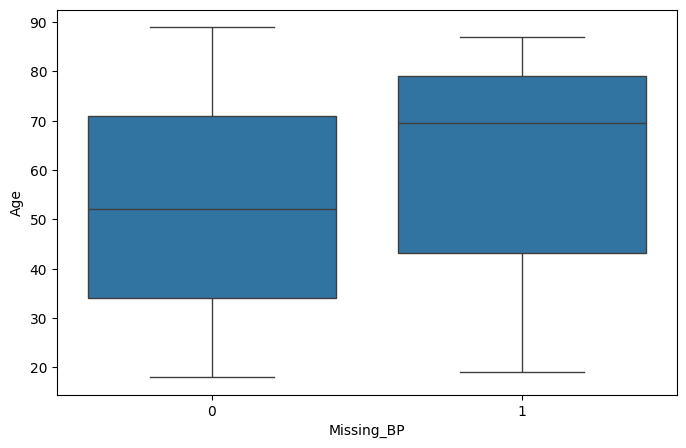

,Missing_BP,Missing_Cholesterol
Gender,,
Female,0.048035,0.048035
Male,0.062745,0.035294


In [2]:
df_missing_analysis = df.copy()
df_missing_analysis["Missing_Gender"] = df_missing_analysis["Gender"].isna().astype(int)
df_missing_analysis["Missing_BP"] = df_missing_analysis["Blood_Pressure"].isna().astype(int)
df_missing_analysis["Missing_Cholesterol"] = df_missing_analysis["Cholesterol"].isna().astype(int)

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_missing_analysis["Missing_BP"], y=df_missing_analysis["Age"])
plt.show()

missing_gender_counts = df_missing_analysis.groupby("Gender")[["Missing_BP", "Missing_Cholesterol"]].mean()
missing_gender_counts


In [3]:
from sklearn.impute import KNNImputer

df_imputed = df.copy()
df_imputed["Blood_Pressure"].fillna(df_imputed["Blood_Pressure"].mean(), inplace=True)
df_imputed["Cholesterol"].fillna(df_imputed["Cholesterol"].mean(), inplace=True)
df_imputed["Gender"].fillna(df_imputed["Gender"].mode()[0], inplace=True)

knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = df.copy()
df_knn_imputed[["Blood_Pressure", "Cholesterol"]] = knn_imputer.fit_transform(df_knn_imputed[["Blood_Pressure", "Cholesterol"]])

df_imputed.describe(), df_knn_imputed.describe()


<ipython-input-3-b9d5f7348c9f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed["Blood_Pressure"].fillna(df_imputed["Blood_Pressure"].mean(), inplace=True)
<ipython-input-3-b9d5f7348c9f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

(       Patient_ID         Age  Blood_Pressure  Cholesterol
 count  505.000000  505.000000      505.000000   505.000000
 mean   249.693069   52.918812      133.412632   200.470103
 std    144.240508   21.064700       25.149755    57.360715
 min      1.000000   18.000000       90.000000   101.000000
 25%    126.000000   34.000000      113.000000   151.000000
 50%    249.000000   52.000000      133.412632   203.000000
 75%    374.000000   71.000000      153.000000   248.000000
 max    500.000000   89.000000      179.000000   299.000000,
        Patient_ID         Age  Blood_Pressure  Cholesterol
 count  505.000000  505.000000      505.000000   505.000000
 mean   249.693069   52.918812      133.414678   200.659149
 std    144.240508   21.064700       25.295313    57.746007
 min      1.000000   18.000000       90.000000   101.000000
 25%    126.000000   34.000000      112.000000   151.000000
 50%    249.000000   52.000000      132.400000   207.000000
 75%    374.000000   71.000000      153

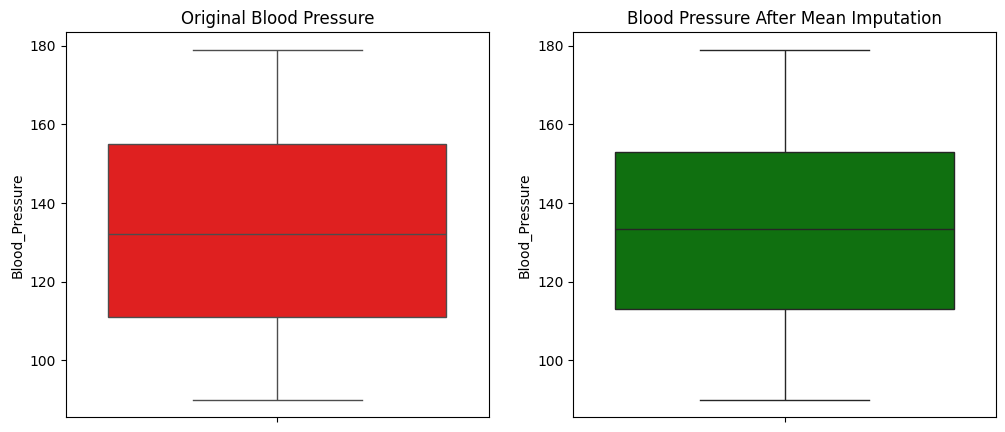

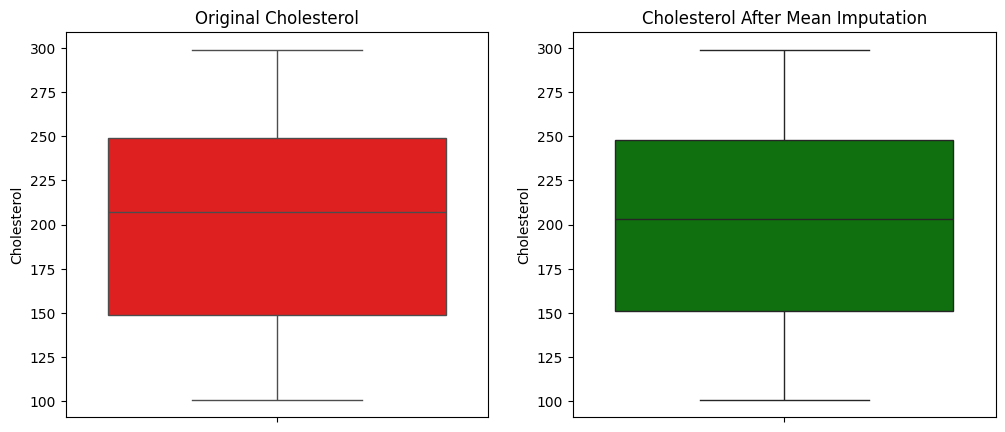

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df["Blood_Pressure"], ax=axes[0], color="red")
axes[0].set_title("Original Blood Pressure")

sns.boxplot(y=df_imputed["Blood_Pressure"], ax=axes[1], color="green")
axes[1].set_title("Blood Pressure After Mean Imputation")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df["Cholesterol"], ax=axes[0], color="red")
axes[0].set_title("Original Cholesterol")

sns.boxplot(y=df_imputed["Cholesterol"], ax=axes[1], color="green")
axes[1].set_title("Cholesterol After Mean Imputation")
plt.show()
